Import necessary libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import TruncatedSVD

Step 1: Define a small corpus

In [2]:
corpus = ["the cat sat on the mat", "the dog barked at the mailman", "the cat meowed at the dog"]

Step 2: Build the word-context co-occurrence matrix

In [3]:
vocab = list(set(" ".join(corpus).split()))  # Unique words in corpus
vocab_size = len(vocab)
word_to_index = {word: i for i, word in enumerate(vocab)}

co_occurrence_matrix = np.zeros((vocab_size, vocab_size))

# Define context window size
window_size = 2

# Populate co-occurrence matrix
for sentence in corpus:
    words = sentence.split()
    for index, word in enumerate(words):
        word_idx = word_to_index[word]
        left_context = max(0, index - window_size)
        right_context = min(len(words), index + window_size + 1)
        for context_word in words[left_context:right_context]:
            if context_word != word:
                co_occurrence_matrix[word_idx, word_to_index[context_word]] += 1

Step 3: Convert co-occurrence matrix to PPMI matrix

In [7]:
def compute_ppmi(matrix):
    total_sum = np.sum(matrix)
    sum_over_words = np.sum(matrix, axis=1, keepdims=True)
    sum_over_context = np.sum(matrix, axis=0, keepdims=True)

    expected = (sum_over_words @ sum_over_context) / total_sum

    # Avoid division by zero by adding a small constant (epsilon)
    epsilon = 1e-10  # Small constant to prevent log(0)
    ppmi_matrix = np.maximum(np.log2((matrix + epsilon) / (expected + epsilon)), 0)

    return ppmi_matrix

ppmi_matrix = compute_ppmi(co_occurrence_matrix)

Step 4: Perform Singular Value Decomposition (SVD)

In [8]:
svd = TruncatedSVD(n_components=2)  # Reduce to 2 dimensions
word_embeddings = svd.fit_transform(ppmi_matrix)

Step 5: Displaying word embeddings in textual format

In [10]:
print("Word Representations (SVD on PPMI Matrix):\n")
for word, vector in zip(vocab, word_embeddings):
    print(f"{word}: {vector}")

Word Representations (SVD on PPMI Matrix):

meowed: [0.81785092 0.22673128]
cat: [1.44442622 0.36368341]
the: [ 1.29147964 -1.06399487]
mat: [1.77011862 2.02025391]
on: [ 2.27042755 -2.29411968]
dog: [0.66373271 0.23257843]
barked: [0.63993015 0.25252377]
mailman: [0.6057587  0.46942807]
at: [ 0.80921423 -0.4421465 ]
sat: [1.63030052 1.25951537]


Step 6: Visualizing word embeddings

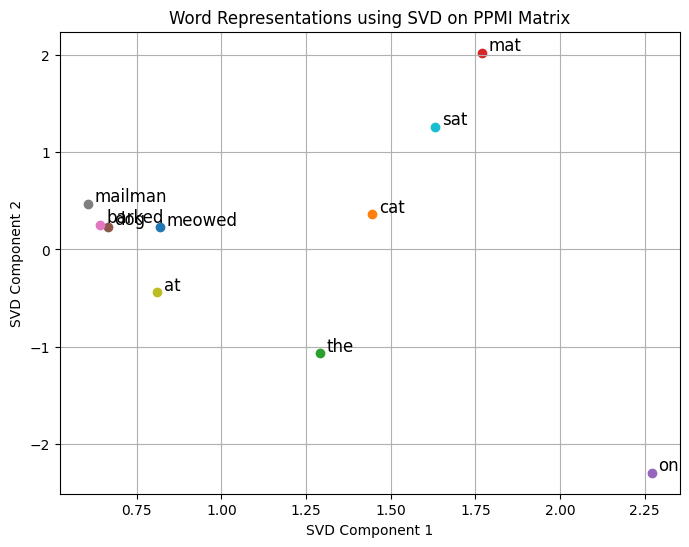

In [11]:
plt.figure(figsize=(8, 6))
for word, (x, y) in zip(vocab, word_embeddings):
    plt.scatter(x, y)
    plt.text(x + 0.02, y + 0.02, word, fontsize=12)
plt.xlabel("SVD Component 1")
plt.ylabel("SVD Component 2")
plt.title("Word Representations using SVD on PPMI Matrix")
plt.grid()
plt.show()